In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.svm import SVC
# from keras.models import Sequential
# from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

2023-10-30 11:42:31.874273: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 11:42:31.971903: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 11:42:31.973216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 11:42:33.584419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df_hujan = pd.read_csv('Dataset/curah hujan.csv')
df_yield = pd.read_csv('Dataset/Hasil Panen OKE sip.csv')

In [3]:
df_yield

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),Unnamed: 5
0,2018,Januari,43573.0,449.24,2781.16,NaN
1,2018,Februari,43573.0,16598.03,102755.27,Naik
2,2018,Maret,43573.0,9352.41,57899.01,Turun
3,2018,April,43573.0,2512.02,15551.44,Turun
4,2018,Mei,43573.0,9882.90,57103.19,Naik
5,2018,Juni,43573.0,7680.37,44377.02,Turun
6,2018,Juli,43573.0,3594.00,20766.00,Turun
7,2018,Agustus,43573.0,1793.23,10361.25,Turun
8,2018,September,43573.0,2663.34,18230.62,Naik
9,2018,Oktober,43573.0,1703.87,11663.03,Turun


In [4]:
## Data Yield
df_yield.to_csv('panen.csv', index=False)
df_panen_baru = pd.read_csv('panen.csv')
df_panen_baru['Produksi Padi (ton/gkg)'] = pd.to_numeric(df_panen_baru['Produksi Padi (ton/gkg)'],errors='coerce')
df_panen_baru = df_panen_baru.loc[:, ~df_panen_baru.columns.str.contains('^Unnamed')]
data = pd.merge(df_panen_baru, df_hujan, on=['Tahun', 'Bulan'])

# df_panen_baru.info()

In [5]:
# data = df_panen_baru

In [6]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2018,Januari,43573.0,449.24,2781.16,296.10
1,2018,Februari,43573.0,16598.03,102755.27,273.90
2,2018,Maret,43573.0,9352.41,57899.01,250.60
3,2018,April,43573.0,2512.02,15551.44,177.30
4,2018,Mei,43573.0,9882.90,57103.19,41.30
5,2018,Juni,43573.0,7680.37,44377.02,0.00
6,2018,Juli,43573.0,3594.00,20766.00,0.00
7,2018,Agustus,43573.0,1793.23,10361.25,0.00
8,2018,September,43573.0,2663.34,18230.62,133.30
9,2018,Oktober,43573.0,1703.87,11663.03,142.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tahun                    60 non-null     int64  
 1   Bulan                    60 non-null     object 
 2   Luas Lahan               60 non-null     float64
 3   Luas Panen (ha)          60 non-null     float64
 4   Produksi Padi (ton/gkg)  60 non-null     float64
 5   curah hujan (mm)         60 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


In [8]:
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

In [9]:
data['Bulan'] = data['Bulan'].map(month_mapping)

In [10]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2018,1,43573.0,449.24,2781.16,296.10
1,2018,2,43573.0,16598.03,102755.27,273.90
2,2018,3,43573.0,9352.41,57899.01,250.60
3,2018,4,43573.0,2512.02,15551.44,177.30
4,2018,5,43573.0,9882.90,57103.19,41.30
5,2018,6,43573.0,7680.37,44377.02,0.00
6,2018,7,43573.0,3594.00,20766.00,0.00
7,2018,8,43573.0,1793.23,10361.25,0.00
8,2018,9,43573.0,2663.34,18230.62,133.30
9,2018,10,43573.0,1703.87,11663.03,142.00


In [11]:
# Function to detect outliers on one-dimensional datasets.
def find_anomalies(data):
    # define a list to accumulate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            
    return anomalies, lower_limit, upper_limit

for col in data.columns:
    anomalies, lower_limit, upper_limit = find_anomalies(data[col])
    print(anomalies)

[]
[]
[]
[]
[]
[732.7]


In [12]:
columns_to_drop = ['Bulan', 'Tahun']
data = data.drop(columns_to_drop, axis=1)
print(data)

    Luas Lahan  Luas Panen (ha)  Produksi Padi (ton/gkg)  curah hujan (mm)
0      43573.0           449.24                  2781.16            296.10
1      43573.0         16598.03                102755.27            273.90
2      43573.0          9352.41                 57899.01            250.60
3      43573.0          2512.02                 15551.44            177.30
4      43573.0          9882.90                 57103.19             41.30
5      43573.0          7680.37                 44377.02              0.00
6      43573.0          3594.00                 20766.00              0.00
7      43573.0          1793.23                 10361.25              0.00
8      43573.0          2663.34                 18230.62            133.30
9      43573.0          1703.87                 11663.03            142.00
10     43573.0           925.73                  6336.64            317.10
11     43573.0           566.50                  3877.70            311.30
12     41212.0          1

In [13]:
# Remove Outlier
from scipy import stats

y = data['Produksi Padi (ton/gkg)']
X = data.drop('Produksi Padi (ton/gkg)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Produksi Padi (ton/gkg)', y)
data = X

In [14]:
# #Min Max
# from sklearn.preprocessing import MinMaxScaler

# y = data['Produksi Padi (ton/gkg)']
# X = data.drop('Produksi Padi (ton/gkg)', axis=1)

# scaler = MinMaxScaler()
# data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
# data_without_yield.columns = X.columns
# data_without_yield.insert(len(data_without_yield.columns), 'Produksi Padi (ton/gkg)', y)

# data = data_without_yield
# print (data)

# Standard scaler
# from sklearn.preprocessing import StandardScaler

# y = data['Produksi Padi (ton/gkg)']
# X = data.drop('Produksi Padi (ton/gkg)', axis=1)

# scaler = StandardScaler()
# data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
# data_without_yield.columns = X.columns
# data_without_yield.insert(len(data_without_yield.columns), 'Produksi Padi (ton/gkg)', y)

# data = data_without_yield
# print (data)

In [15]:
# pembagian data
n_split = int(len(X) * .8)
X = data.iloc [:n_split, :-1].values
y= data.iloc [:n_split, -1].values
Xtest=data.iloc[n_split:, :-1].values
ytest=data.iloc[n_split:, -1].values

In [32]:
# data.iloc[:, 3:4]

In [17]:
ytest

array([   618.63, 102194.51,  90703.72,  13965.33,  14177.11, 107551.27,
        27669.02,  14655.14,   6836.77,  22863.35,   8304.24,   1703.11])

In [25]:
model = SVR(kernel='linear', C=10)
model.fit(X,y)
pred=model.predict(Xtest)

In [26]:
pred

array([  625.18728237, 93469.42299824, 83137.7780817 , 12996.88842945,
       13292.52541142, 98244.13371639, 25601.10703449, 12537.86604481,
        6235.81751423, 20520.66261082,  6693.89533787,  1281.58642178])

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Evaluasi model
mse = mean_squared_error(ytest, pred)

mae = mean_absolute_error(ytest, pred)

mape = mean_absolute_percentage_error(ytest,pred)

r2 = r2_score(ytest, pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 19924429.271214552
Mean Absolute Error (MAE): 3051.536973431755
Mean Absolute Error (MAPE): 0.10405541084053115
r2 Score: 0.9868361792609301


In [28]:
ytest

array([   618.63, 102194.51,  90703.72,  13965.33,  14177.11, 107551.27,
        27669.02,  14655.14,   6836.77,  22863.35,   8304.24,   1703.11])

In [29]:
pred

array([  625.18728237, 93469.42299824, 83137.7780817 , 12996.88842945,
       13292.52541142, 98244.13371639, 25601.10703449, 12537.86604481,
        6235.81751423, 20520.66261082,  6693.89533787,  1281.58642178])

<Figure size 640x480 with 0 Axes>

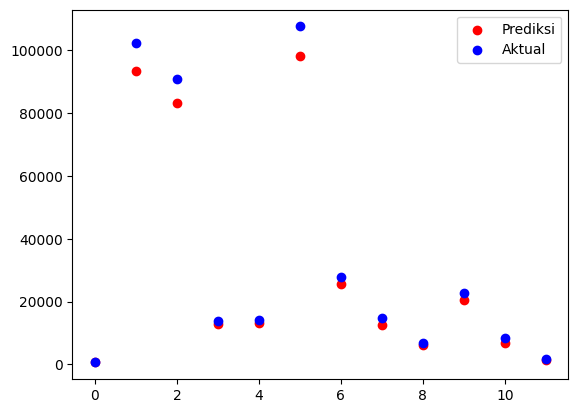

<Figure size 640x480 with 0 Axes>

In [30]:
a1 = range(len(Xtest))
plt.scatter(a1, pred, color='red')
plt.scatter(a1, ytest, color='blue')
plt.legend(["Prediksi", "Aktual"], loc ="upper right") 
plt.figure()

In [31]:
# Define the data as a list of dictionaries
new_data = [
    {'Tahun': 2023, 'Bulan': 'Januari', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Februari', 'Luas Lahan': 36637.27, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Maret', 'Luas Lahan': 35637.23, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'April', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Mei', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Juni', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Juli', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Agustus', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'September', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Oktober', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'November', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Desember', 'Luas Lahan': 1000, 'Luas Panen (ha)': 800}
]
# Create a DataFrame from the list of dictionaries
new_data = pd.DataFrame(data)

# Konversi data kategoris
new_data = pd.get_dummies(new_data, columns=['Bulan'])

# Gunakan model untuk memprediksi produksi padi
predicted_production = model.predict(new_data)

# Tampilkan hasil prediksi
print(f'Prediksi Produksi Padi: {predicted_production[0]}')

KeyError: "None of [Index(['Bulan'], dtype='object')] are in the [columns]"